# Wine Quality Prediction

## Description
The goal of this project is to predict the quality of wine based on its chemical characteristics, such as density, acidity, and other relevant features. This prediction can assist in real-world applications of machine learning in viticulture.

## Key Concepts and Challenges
1. **Classifier Models**: Utilizing Random Forest, Stochastic Gradient Descent (SGD), and Support Vector Classifier (SVC) for wine quality prediction.  
2. **Chemical Qualities**: Analyzing features like density and acidity as predictors for wine quality.  
3. **Data Analysis Libraries**: Employing Pandas for data manipulation and Numpy for array operations.  
4. **Data Visualization**: Using Seaborn and Matplotlib for visualizing patterns and insights in the dataset.


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

## Data Loading and Cleaning

In this section, we load the dataset, check for missing values, and remove duplicates. We also drop unnecessary columns, such as the `Id`, and separate features and the target variable.



In [3]:
#load dataset
file_path='C:/Users/ADMIN/Desktop/WORK/Jobs/Oasis_Internship/WineQT.csv'
df=pd.read_csv(file_path)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
# Cleaning data
## Check for missing values
print('Missing Values: ')
print(df.isnull().sum())
# Duplicates
print(f'Number of duplicate rows: {df.duplicated().sum()}')
#Remove duplicates
df.drop_duplicates(inplace=True)
# Data types
print("\nDataset Infomation:")
print(df.info())
# Check the distribution of the quality scores
print("\nQuality distribution:")
print(df['quality'].value_counts())

Missing Values: 
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64
Number of duplicate rows: 0

Dataset Infomation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density     

### Drop unnecessary columns and separate features/target
The `Id` column is irrelevant to the prediction, so we drop it. We then separate the features and target variables.

In [ ]:
# Drop the 'Id' column as it's not necessary for prediction
df = df.drop(columns=['Id'])



## Feature Scaling
To ensure that all features are on the same scale, we apply **StandardScaler** to scale the features before feeding them into the models.

In [ ]:
# Separate features and target
X = df.drop(columns=['quality'])
y = df['quality']

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Show the first few rows of the scaled features
print("\nFirst few rows of scaled features:")
print(X_scaled[:5])

# Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


First few rows of scaled features:
[[-0.52157961  0.93933222 -1.36502663 -0.46642142 -0.23139486 -0.45046702
  -0.3636101   0.55585438  1.27069495 -0.57365783 -0.96338181]
 [-0.29259344  1.94181282 -1.36502663  0.05006018  0.23424656  0.91591972
   0.64347653  0.03616459 -0.70892755  0.1308811  -0.59360107]
 [-0.29259344  1.27349242 -1.16156762 -0.17128908  0.10725344 -0.06007081
   0.24674544  0.14010255 -0.32577481 -0.04525363 -0.59360107]
 [ 1.65378902 -1.39978919  1.48339955 -0.46642142 -0.25256038  0.1351273
   0.4298521   0.65979234 -0.96436271 -0.45623467 -0.59360107]
 [-0.52157961  0.93933222 -1.36502663 -0.46642142 -0.23139486 -0.45046702
  -0.3636101   0.55585438  1.27069495 -0.57365783 -0.96338181]]


## Model Training

We train three different classifiers to predict wine quality: **Random Forest**, **Stochastic Gradient Descent (SGD)**, and **Support Vector Classifier (SVC)**.

### Random Forest Classifier

In [6]:
#Training the Models
# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier:
Accuracy: 0.7030567685589519
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.72      0.80      0.76        96
           6       0.68      0.67      0.67        99
           7       0.72      0.69      0.71        26
           8       0.00      0.00      0.00         2

    accuracy                           0.70       229
   macro avg       0.42      0.43      0.43       229
weighted avg       0.68      0.70      0.69       229



C:\Users\ADMIN\.conda\envs\creatingPythonEnv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADMIN\.conda\envs\creatingPythonEnv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADMIN\.conda\envs\creatingPythonEnv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

### Stochastic Gradient Descent (SGD) Classifier

In [7]:
# Initialize the SGD classifier
sgd = SGDClassifier(random_state=42)

# Train the model
sgd.fit(X_train, y_train)

# Predict on the test set
y_pred_sgd = sgd.predict(X_test)

# Evaluate the model
print("Stochastic Gradient Descent (SGD):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_sgd)}")
print(classification_report(y_test, y_pred_sgd))

Stochastic Gradient Descent (SGD):
Accuracy: 0.4585152838427948
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.46      0.98      0.63        96
           6       0.56      0.05      0.09        99
           7       0.38      0.23      0.29        26
           8       0.00      0.00      0.00         2

    accuracy                           0.46       229
   macro avg       0.28      0.25      0.20       229
weighted avg       0.48      0.46      0.34       229



C:\Users\ADMIN\.conda\envs\creatingPythonEnv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADMIN\.conda\envs\creatingPythonEnv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADMIN\.conda\envs\creatingPythonEnv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

### Support Vector Classifier (SVC)

In [8]:
# Initialize the SVC classifier
svc = SVC(random_state=42)

# Train the model
svc.fit(X_train, y_train)

# Predict on the test set
y_pred_svc = svc.predict(X_test)

# Evaluate the model
print("Support Vector Classifier (SVC):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc)}")
print(classification_report(y_test, y_pred_svc))

Support Vector Classifier (SVC):
Accuracy: 0.5633187772925764
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.43      0.54        96
           6       0.51      0.88      0.64        99
           7       1.00      0.04      0.07        26
           8       0.00      0.00      0.00         2

    accuracy                           0.56       229
   macro avg       0.45      0.27      0.25       229
weighted avg       0.64      0.56      0.51       229



C:\Users\ADMIN\.conda\envs\creatingPythonEnv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADMIN\.conda\envs\creatingPythonEnv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADMIN\.conda\envs\creatingPythonEnv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

## Addressing imbalance
We will Apply SMOTE to handle class imbalance

In [9]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print(f"Original class distribution:\n{y.value_counts()}")
print(f"Resampled class distribution:\n{y_resampled.value_counts()}")

Original class distribution:
quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64
Resampled class distribution:
quality
5    483
6    483
7    483
4    483
8    483
3    483
Name: count, dtype: int64


## Define models

We define three machine learning models: RandomForestClassifier, SVC, and SGDClassifier. These models will be trained and evaluated on the resampled dataset.

In [ ]:

rf = RandomForestClassifier(random_state=42)
svc = SVC(random_state=42)
sgd = SGDClassifier(random_state=42)

# Hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Hyperparameter grid for SVC
svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Hyperparameter grid for SGD
sgd_param_grid = {
    'loss': ['hinge', 'log', 'squared_hinge'],
    'penalty': ['l2', 'l1'],
    'alpha': [0.0001, 0.001]
}

## Model Tuning using GridSearchCV

We now perform GridSearchCV on each model using the hyperparameter grids defined earlier. This will search through all combinations of parameters and select the best one based on accuracy using cross-validation.

In [ ]:
# GridSearchCV for Random Forest
rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy')
rf_grid.fit(X_resampled, y_resampled)

# GridSearchCV for SVC
svc_grid = GridSearchCV(svc, svc_param_grid, cv=5, scoring='accuracy')
svc_grid.fit(X_resampled, y_resampled)

# GridSearchCV for SGD
sgd_grid = GridSearchCV(sgd, sgd_param_grid, cv=5, scoring='accuracy')
sgd_grid.fit(X_resampled, y_resampled)

# Output best parameters for each model
print(f"Best parameters for Random Forest: {rf_grid.best_params_}")
print(f"Best parameters for SVC: {svc_grid.best_params_}")
print(f"Best parameters for SGD: {sgd_grid.best_params_}")

# Cross-validation for model performance
rf_cv_scores = cross_val_score(rf_grid.best_estimator_, X_resampled, y_resampled, cv=5)
svc_cv_scores = cross_val_score(svc_grid.best_estimator_, X_resampled, y_resampled, cv=5)
sgd_cv_scores = cross_val_score(sgd_grid.best_estimator_, X_resampled, y_resampled, cv=5)

print(f"Random Forest CV Accuracy: {rf_cv_scores.mean()}")
print(f"SVC CV Accuracy: {svc_cv_scores.mean()}")
print(f"SGD CV Accuracy: {sgd_cv_scores.mean()}")

C:\Users\ADMIN\.conda\envs\creatingPythonEnv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ADMIN\.conda\envs\creatingPythonEnv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADMIN\.conda\envs\creatingPythonEnv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\ADMIN\.conda\envs\creatingPythonEnv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    val

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}
Best parameters for SVC: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best parameters for SGD: {'alpha': 0.0001, 'loss': 'squared_hinge', 'penalty': 'l1'}
Random Forest CV Accuracy: 0.8140086951342982
SVC CV Accuracy: 0.7594836519564052
SGD CV Accuracy: 0.46061699720088145


## Random Forest, SVC and SGD Evaluation

In this section, we evaluate the performance of the three models: **Random Forest**, **Support Vector Classifier (SVC)**, and **Stochastic Gradient Descent (SGD)**. 

- **Random Forest** is evaluated using its **classification report**, which includes key metrics such as precision, recall, and F1-score, as well as the **confusion matrix** to visualize the true and false positives/negatives for each class.
- **SVC** is evaluated similarly, with its own **classification report** and **confusion matrix** to assess its accuracy and performance in classifying the data.
- **SGD** is also evaluated using the same process, providing insights into its performance based on various classification metrics and its confusion matrix.

By comparing the evaluation results, we can determine which model performs best for the given task and dataset.


Random Forest Classification Report:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       483
           4       1.00      1.00      1.00       483
           5       1.00      1.00      1.00       483
           6       1.00      1.00      1.00       483
           7       1.00      1.00      1.00       483
           8       1.00      1.00      1.00       483

    accuracy                           1.00      2898
   macro avg       1.00      1.00      1.00      2898
weighted avg       1.00      1.00      1.00      2898



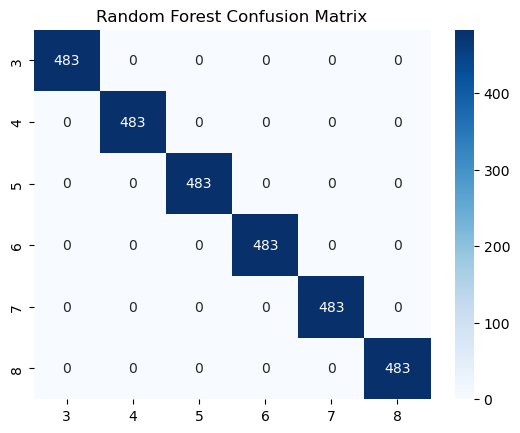

SVC Classification Report:
              precision    recall  f1-score   support

           3       0.97      1.00      0.98       483
           4       0.98      0.98      0.98       483
           5       0.96      0.93      0.94       483
           6       0.94      0.92      0.93       483
           7       0.97      0.98      0.97       483
           8       0.97      0.99      0.98       483

    accuracy                           0.97      2898
   macro avg       0.96      0.97      0.96      2898
weighted avg       0.96      0.97      0.96      2898



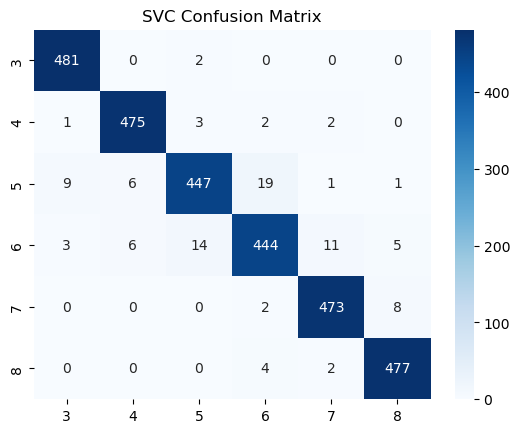

SGD Classification Report:
              precision    recall  f1-score   support

           3       0.85      0.61      0.71       483
           4       0.30      0.81      0.44       483
           5       0.67      0.13      0.22       483
           6       0.25      0.26      0.25       483
           7       0.58      0.12      0.20       483
           8       0.58      0.63      0.61       483

    accuracy                           0.43      2898
   macro avg       0.54      0.43      0.41      2898
weighted avg       0.54      0.43      0.41      2898



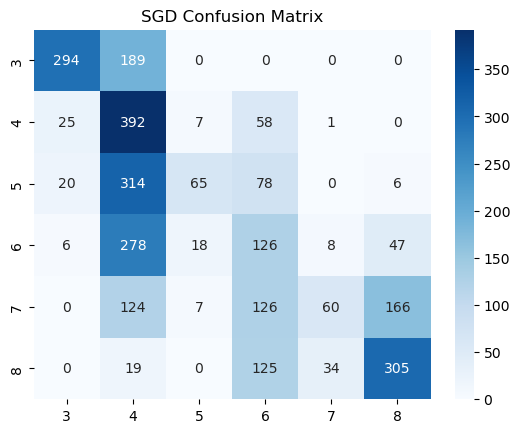

In [17]:
# Evaluate Random Forest
rf_pred = rf_grid.best_estimator_.predict(X_resampled)
print("Random Forest Classification Report:")
print(classification_report(y_resampled, rf_pred))

# Confusion matrix for Random Forest
rf_cm = confusion_matrix(y_resampled, rf_pred)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(3, 9), yticklabels=range(3, 9))
plt.title('Random Forest Confusion Matrix')
plt.show()

# Evaluate SVC
svc_pred = svc_grid.best_estimator_.predict(X_resampled)
print("SVC Classification Report:")
print(classification_report(y_resampled, svc_pred))

# Confusion matrix for SVC
svc_cm = confusion_matrix(y_resampled, svc_pred)
sns.heatmap(svc_cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(3, 9), yticklabels=range(3, 9))
plt.title('SVC Confusion Matrix')
plt.show()

# Evaluate SGD
sgd_pred = sgd_grid.best_estimator_.predict(X_resampled)
print("SGD Classification Report:")
print(classification_report(y_resampled, sgd_pred))

# Confusion matrix for SGD
sgd_cm = confusion_matrix(y_resampled, sgd_pred)
sns.heatmap(sgd_cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(3, 9), yticklabels=range(3, 9))
plt.title('SGD Confusion Matrix')
plt.show()

## Analyze Chemical Features

In this section, we analyze the importance of each feature used in training the **Random Forest** model. We extract the feature importances from the best-fitted model obtained through the grid search. 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17060\1880052770.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


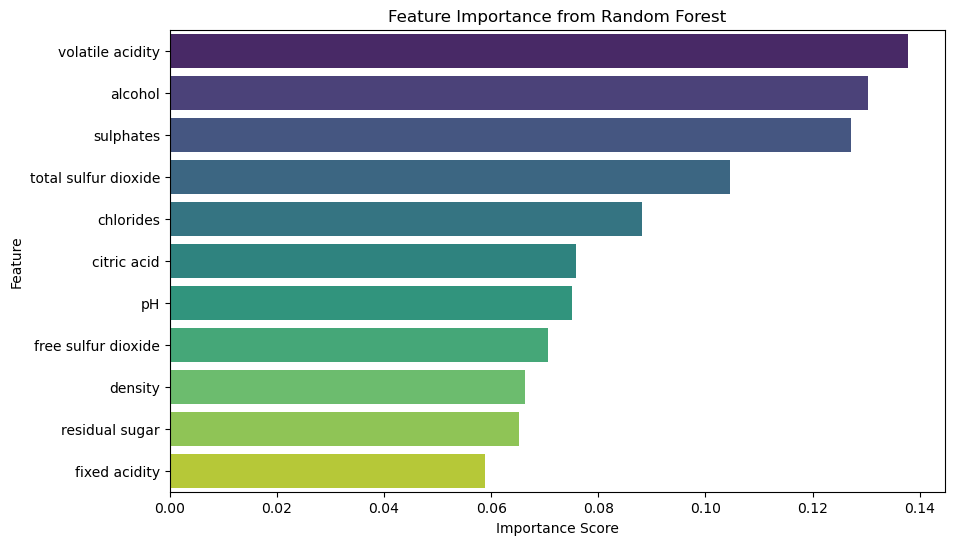

In [19]:
# Analyze Chemical Features
# Get feature importance from the best-fitted Random Forest model
feature_importances = rf_grid.best_estimator_.feature_importances_
features = X.columns  # Ensure X is the DataFrame of input features used for training

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()
